# Tips
## My suggestions
1. code review for the whole projects row by row
2. avoid cross import


### Unify the DataFrame
when work with a project,all the Dataframe should share the same properties in respect of：
	1. multiIndex or single Index,if multiIndex,then they should share the same index.names
	2. the category of index or column should be the same.You can use the function like `df.index.astye('str')` to unify them.For multiIndex,you can use functions like `df.index.levels[1].astype(str)` to unify them.
	3. If the index is datetime,think about the following aspects:
		1. timestamp or period?
		2. frequency
		3. month end?
    4. all the pandas.Series should have a name,and all the index of DataFrame should have names.


    
## Structure of Code is Key  
do not:
1. Multiple and messy circular dependencies.Don't import class or function from each other.
2. Hidden coupling: each and every change in Table's implementation breaks 20 tests in unrelated test cases bevcause it breaks Carpenter's code,which requires very careful surgery to adapt the change.This means you have too many assumptions about Table in Carpenter's code or the reverse.
3. Heavy usage of global state or context: instead of explicityly passing `(height,width,type,wood)` to each other,Table and Carpenter rely on global variables that can be modified and are modified on the fly by different agents.You need to scrutinize all access to these global variables to understand why a rectangular table became a square,and discover that remote template code is also modifying this context,messing with table dimensions.
4. Spaghetti code: multiple pages of nested if clauses and for loops with a lot of copy pasted procesural code and no proper segmentation are known as spaghetti code.

## Modules  
Python modules are one of teh main abstraction layers available and probably the most natural one.Abstraction layers allow separating code into parts holding ralated data and functionality.  

For example,a layer of project can handle interfacing with user actions,while another would handle low level manipulation of data.The most natural way to separate these two layers is to regroup all interfacing functionality in one file,and all low level operations in another file.In this case,the interface file needs to import the low level file.  

**Using import \* makes code harder to read and makes dependencies less compartmentalized.**  

## Packages  
A file `modu.py` in the directory `apck/` is imported with the statement `import pack.modu`.This statement will look for an `__init__.py` file in `pack`,execute all of its top-level statements.Then it will look for a file named `pack/modu.py` and execute all of its top-level statements.  

## Object-oriented programming  
Carefully isolating functions with context and side-effects from functions with logic(called pure functions) allow the following benefits:  
* Pure functions are deterministic:given a fixed input,the output will always be the same.
* Pure functions are much easier to change or replace if they need to be refactored or optimized.
* Pure functions are easier to test with unit-tests:There is less need for complex context setup and data cleaning afterwards.
* Pure functions are easier to manipulate,decorate,and pass around. 

In summary,pure functions are more efficient building blocks than classes and objects for some architectures because they have no context or side-effects.  

Obviously,object-orientation is useful and even necessary in many cases,for example when developing graphical desktop applications or games,where the things that are manipulated (windows,buttions,avatars,vehicles) have a relatively long life of their own in the computer's memory.


## Decorators  
The 'decorated'function or method will replace the original 'undecorated' function or method.Because functions are first-class objects in Python.  

This mechanism is useful for seperating concerns and avoiding external un-related logic 'polluting' the core logic of the function or method.A good example of a piece of functionality that is better hanled with decoration is memoization or cashing: you want to store the results of an expensive function in a table and use them directly instead of recomputing them when they have already been computed.  

## Dynamic typing  
Avoid using the same variable name for different things.  
There is no efficiency gain when reusing names:the assignments will have to create new objects anyway.  

## Mutable and immutable types  
Immutable types provide no method for changing their content.For instance,the variable x set to the integer 6 has no 'increment' method.If you want to compute x+1,you have to create another integer and give it a name.  
```python
x=6
x=x+1
```

**Bad**  
```python
#create a concatenated string from 0 to 19
nums=''
for n in range(20):
    nums+=str(n) # slow and inefficient
print nums
```

**Good**  
```python
nums=[]
for n in range(20):
    nums.append(str(n))
print ''.join(nums) # much more efficient
```

**Better**
```python 
nums=[str(n) for n in range(20)]
print ''.join(nums) 
``` 

**Best**  
```python 
nums=map(str,range(20))
print ''.join(nums)
```

`join()` is not always best.Sometimes, using the addition operator is actually facter.  
```python
foo='foo'
bar='bar'

foobar=foo+bar # This is good
foo+='ooo'# This is bad,instead you should do:
foo=''.join([foo,'ooo'])
```

```python
foo='foo'
bar='bar'

foobar='%s%s'%(foo,bar) #It is OK
foobar='{0}{1}'.format(foo,bar) #It is better
foobar='{foo}{bar}'.format(foo=foo,bar=bar) #It is best
```

---------------------
## Code style  

**One statement per line**  

*bad*
```python
if <complex comparison> and <other complex comparison>:
    # do something
```

*good*
```python
cond1=<complex comparison>
cond2=<other complex comparison>
if cond1 and cond2:
    #do something
```

**Unpacking**    
a,b=b,a


** Searching for an item in a collection**  
```python
l=['s','p','a','b']
s=set(['s','p','a','b'])

def lookup_list(s): #not good
    return 's' in l
    
def lookup_set(s): #better
    return 's' in s
```
To determine whether an item is in a list,Python will have to go through each item until find a matching item.This is time consuming,especially for long lists.In a set,on the other hand,the hash of the item will tell Python where in the set to look for a matching item.As a result ,the search can be done quickly,even if the set is large.Searching in dictornaries works the same way.  


**Short ways to manipulate lists**  

*bad*
```python 
#Filter elements greater thean 4
a=[3,4,5]
b=[]
for i in a:
    if i>4:
        b.append(i)
```

*Good*
```python
a=[3,4,5]
b=[i for i in a if i>4]
#OR:
b=filter(lambda x:x>4,a)
```

*bad*
```python
#add three to all list members
a[3,4,5]
for i in range(len(a)):
    a[i]+=3
```

*Good*  
```python
a=[3,4,5]
a=[i+3 for i in a]
# OR:
a=map(lambda x:x+3,a)
```

** Read From a File **  

*bad*
```python
f=open('file.txt')
a=f.read()
print a 
f.close()
```
*Good*
```python
with open('file.txt') as f:
    for line in f:
        print line
```

# encode and decoding
**Encoding** is the process of translating a string of characters into its raw bytes form,according to a desired encoding name. **Decoding** is the process of translating a raw string of bytes into its character string form,according to its encoding name.

**Encoding**: `str`$\rightarrow$ `bytes`  
**Decoding**: `bytes-like object` $\rightarrow$ `str`   

python3 with 3 string object types:
1. `str` for representing Unicode text (both 8-bit and wide) 
2. `bytes` for representing binary data 
3. `bytearray` a mutable flavor of the bytes type

In [1]:
B=b'spam' # make a bytes object (8-bit bytes)
S='eggs'  # make a str object (unicode chracters,8-bit or wider)

type(B),type(S)

(bytes, str)

## handle the problem of `UnicodeEncodeError`:`gbk codec can't encode character...`

In [2]:
import locale
import sys

def p(f):
    print('%s.%s():%s'%(f.__module__,f.__name__,f()))

In [3]:
# 返回当前系统所使用的默认字符编码
p(sys.getdefaultencoding)

sys.getdefaultencoding():utf-8


In [4]:
#返回用于转换Unicode文件名至系统文件名所使用的编码
p(sys.getfilesystemencoding)

sys.getfilesystemencoding():utf-8


In [5]:
# 获取默认的区域设置并返回元组（语言，编码）
p(locale.getdefaultlocale)

locale.getdefaultlocale():('zh_CN', 'cp936')


In [6]:
# 返回用户设定的文本数据编码
# 文档提到this function only returns a guess
p(locale.getpreferredencoding)

locale.getpreferredencoding():cp936


In [7]:
# \xba\xba 是‘汉’的 GBK 编码
# mbcs 是不推荐使用的编码，这里仅作测试表明为什么不应该用
print(r"'\xba\xba'.decode('mbcs'):",repr('\xba\xba'.decode('mbcs')))

AttributeError: 'str' object has no attribute 'decode'

```python
open(file,mode='r',buffering=-1,encoding=None,errors=None,newline=None,closefd=True,opener=None)
```
>  
1. ***encoding*** is the name of the encoding used to decode or encode the file.This should only be used in text mode.The default encoding is platform dependent (whatever `locale.getpreferredencoding()` returns),but any text encoding supported by Python can be used.For reading and writing raw bytes use binary mode and leave encoding unspecified.
errors can be 'ignore','replace' and so on.
2. Python distinguishes between binary and text I/O,Files opened in binary mode (including 'b' in the mode argument) return contents as `bytes` objects without any decoding.In text mode (the default,or then 't' is included in the mode argument),the contents of the file are returned as `str`,the bytes having been first decode using a platform-dependent encoding or using the specified encoding if given.  
3. Note:Python doesn't depend on the underlying operating system's notion of text files;all the processing is done by Python itself,and is thererfore platform-independent.
4. *** When we open file with 'r' mode,open will first decode the content.And when we open file with 'w' mode,open will first encode the str we send in.***


so,by default `with open('name.txt','w') as f:` will write with encoding of `cp936`.We'd better set the `encoding` as `utf-8`,if there is `UnicodeEncodeError` with writing function.For example:
```python

direc=r'D:\app\HistCite Pro 2.0\TXT'
fns=os.listdir(direc)

content=[]
for fn in fns:
    '''
    if we use open(os.path.join(direc,fn)).read(),open will first decode the bytes in the file with 
    default encoding type,that is,cp936.But this will send us an UnicodeDecodeError:'gbk' codec can't decode byte
    ...
    So,we set the encoding as 'utf-8' to force open decode the bytes in file with 'utf-8'
    '''
    con=open(os.path.join(direc,fn),encoding='utf-8').read()
    content.append(con)

    '''
    In the same way,here we assign the encoding as 'utf-8' again,or it will encode the str with encoding='cp936' and 
    send use an UnicodeEncodeError:'gbk' codec can't encode character.....
    '''
with open('bib.txt','w',encoding='utf-8') as f:
    f.write('\n'.join(content))
```

## `read_csv` with `UnicodeDecodeError`
refer to [this link](https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python)
```python
def txt2csv(fns):
    for fn in fns:
        p = os.path.join(txtpath, fn)
        # use python to python engine to parse the data,since there are some files too big.
        try:
            df = pd.read_csv(p, sep='\t', encoding='ISO-8859-1', error_bad_lines=False, skiprows=[1, 2])
        except:
            df = pd.read_csv(p, sep='\t', encoding='ISO-8859-1', error_bad_lines=False, skiprows=[1, 2],
                             engine='python')
        df.to_csv(os.path.join(r'E:\a\tmp', fn[:-4] + '.csv'), encoding='utf-8')
```

### parse text
**Tipes**:
1. Before parsing the text,use notepad++ (show the hiden characters with the theme of deep black,for more tricks about notepad++,refer to windows.md) to analyse the delimiter of the text （End of the line and sep).  
2. read the official documents about `open`:
    ```
    open(file,mode='r',buffering=-1,encoding=None,errors=None,newline=None,closefd=True,opener=None)
    ```
    `encoding` is the name of the encoding used to decode or encode the file.This should only be used in text mode.The default encoding is platform dependent (whatever `locale.getpreferedencoding()` returns),but any text encoding supported by Python can be used.
    
    `newline` controls how [universal newlines](https://docs.python.org/3/glossary.html) mode works (it only applies to text mode).It can be `None`,`''`,`'\n'`,`'\r'`,and `'\r\n'`.It works as follows:
    - When reading input from the stream,if newline is `None`,universal newlines mode is enabled.Lines in the input can end in `'\n'`,`'\r'`,or `'\r\n'`,and these are translated into `'\n'` before being returned to the caller.If it is `''`,universal newliens mode is enabled,but line endings are returned to the caller untranslated.If it has any of the other legal values,input lines are only terminated by the given string,and the line ending is returned to the caller untranslated.
    - When writing output to the stream,if newline is `None`,any `'\n'` chracters written are translated to the system default line separator,`os.linesep`.If newline is `''` or `'\n'`,no translation takes place.If newline is any of the other legal values,any `'\n'` characters written are translated to the given string.
    
Example:
```python
def clean_txt(fn):
    inputPath=os.path.join(txtDir, fn)
    outputPath=os.path.join(txtNewDir, fn)
    bunchsize=1000000
    valid=0
    invalid=0
    bunch=[]
    with open(inputPath,encoding='ISO-8859-1',newline='\r\n') as r,\
            open(outputPath,'w',encoding='ISO-8859-1') as w:
        coln=len(r.readline().split('\t'))
        for line in r:
            if len(line.split('\t'))==coln:
                # bunch.append(line+'\n') #'\n` denote CRLF in python3
                # bunch.append(line.replace('\n','').replace(' ','')) #'\n` denote CRLF in python3
                # newline=line.replace('\n','').replace(' ','').replace(',','').replace('\t',',')
                newline=line.replace('\n','').replace(' ','')
                bunch.append(newline)
                valid+=1
            else:
                invalid+=1

            if len(bunch)==bunchsize:
                # w.write(l+'\r\n' for l in bunch)
                w.writelines(bunch) #equals w.write(l+'\n' for l in bunch)
                bunch=[]

        w.writelines(bunch)

    print(fn)
    return fn,valid,invalid
```

# time
refer to [this link](https://stackoverflow.com/questions/415511/how-to-get-current-time-in-python/415519#415519)

In [24]:
from datetime import datetime

datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2018-04-04 11:50:08'

In [26]:
str(datetime.now())

'2018-04-04 11:50:28.256350'

In [27]:
import time

time.strftime('%Y-%m-%d %H:%M:%S')

'2018-04-04 11:51:21'

# 30-seconds-of-python-code
refer to https://github.com/kriadmin/30-seconds-of-python-code#bubble_sort

## List
### chunk
chunks an list into smaller lists of a specified size

In [4]:
from math import ceil

def chunk(lst,size):
    return list(map(lambda x:lst[x*size:x*size+size],
                    list(range(0,ceil(len(lst)/size)))))

chunk([1,2,3,4,5],2)

[[1, 2], [3, 4], [5]]

### compact
use `filter()` to filter out falsey values(false,None,0,and "")

In [7]:
def compact(lst):
    return list(filter(bool,lst))

compact([0,1,False,2,'',3,'a','s',34])

[1, 2, 3, 'a', 's', 34]

### count_by
already implemented `collections.Counter`  

Groups the element of a list based on the given function and returns the count of elements in each group.

In [9]:
def count_by(lst,fn=lambda x:x):
    key={}
    for el in map(fn,lst):
        key[el]=0 if el not in key else key[el]
        key[el]+=1
    return key

from math import floor
count_by([6.1,6.8,4.2],floor)

{4: 1, 6: 2}

In [10]:
count_by(['one','two','three'],lambda x:x[0])

{'o': 1, 't': 2}

### Group

In [1]:
def group_with(lst, func=lambda x: x):
    '''
    group the list by applying func
    '''
    key = {}
    for initial, transformed in zip(lst, map(func, lst)):
        key[transformed] = [] if transformed not in key else key[
            transformed]
        key[transformed].append(initial)
    return key

In [2]:
group_with(['a1','a2','b1','c3','b3'],func=lambda x:x[0])

{'a': ['a1', 'a2'], 'b': ['b1', 'b3'], 'c': ['c3']}

### count_occurences
Already implemented via `list.count()`  

In [11]:
def count_occurences(lst,val):
    return len([x for x in lst if x==val and type(x)==type(val)])

count_occurences([1,1,2,1.0,2,1.0,3],1.0)

2

### deep_flatten

In [12]:
def spread(arg):
    ret=[]
    for i in arg:
        if isinstance(i,list):
            ret.extend(i)
        else:
            ret.append(i)
    return ret

def deep_flatten(lst):
    result=[]
    result.extend(spread(list(map(lambda x:deep_flatten(x) if
                                 type(x)==list else x,lst))))
    return result

deep_flatten([1,[2],[[3],4],5])

[1, 2, 3, 4, 5]

### difference_by
Returns the difference between two list,after applying the provided function to each list element of both.

In [13]:
def difference_by(a,b,fn=lambda x:x):
    b=set(map(fn,b))
    return [item for item in a if fn(item) not in b]

from math import floor
difference_by([2.1,1.2],[2.3,3.4],floor)

[1.2]

### has_duplicates

In [14]:
def has_duplicates(lst):
    return len(lst)!=len(set(lst))

has_duplicates([1,1,2,4])

True

### shuffle

In [16]:
from copy import deepcopy
from random import randint

def shuffle(lst):
    temp_lst=deepcopy(lst)
    m=len(temp_lst)
    while(m):
        m-=1
        i=randint(0,m)
        temp_lst[m],temp_lst[i],temp_lst[m]
    return temp_lst

foo =[1,2,3]
shuffle(foo)

[1, 2, 3]

### zip
Already implemented via `itertools.zip_longest()`

In [17]:
def zip(*args,fillvalue=None):
    max_length=max([len(lst) for lst in args])
    result=[]
    for i in range(max_length):
        result.append([
            args[k][i] if i<len(args[k]) else None for k in range(len(args))
        ])
    return result

zip(['a','b'],[1,2],[True,False])

[['a', 1, True], ['b', 2, False]]

In [18]:
zip(['a'],[1,2],[True,False,True])

[['a', 1, True], [None, 2, False], [None, None, True]]

## math
### max_n

In [19]:
def max_n(lst,n=1,reverse=True):
    return sorted(lst,reverse=reverse)[:n]

## String
### capitalize

In [20]:
def capitalize(string,lower_rest=False):
    return string[:1].upper() + (string[1:].lower() if lower_rest else string[1:])

capitalize('fooBar')

'FooBar'

In [21]:
capitalize('fooBar',lower_rest=True)

'Foobar'

### capitalize_every_word
uses `str.title` to capitalize first letter of every word in the string.

In [22]:
def capitalize_every_word(string):
    return string.title()

capitalize_every_word('hello world!')

'Hello World!'

# flatten a nested list

In [8]:
ll =[[52, None, None], [129, None, None], [56, None, None], [111, None, None]]

## list of comprehension

In [9]:
nl=[x for l in ll for x in l]
nl

[52, None, None, 129, None, None, 56, None, None, 111, None, None]

## `chain` from `itertools`

In [10]:
from itertools import chain
nl=list(chain(*ll))
nl

[52, None, None, 129, None, None, 56, None, None, 111, None, None]

## use `chain.from_iterable`

In [11]:
nl=list(chain.from_iterable(ll))
nl

[52, None, None, 129, None, None, 56, None, None, 111, None, None]

## `sum`

In [12]:
nl=sum(ll,[])
nl

[52, None, None, 129, None, None, 56, None, None, 111, None, None]

## use `reduce` function

In [15]:
from functools import reduce

nl=reduce(lambda x,y:x+y,ll)
nl

[52, None, None, 129, None, None, 56, None, None, 111, None, None]

## `operator.add`

In [16]:
import operator
nl=reduce(operator.add,ll)
nl

[52, None, None, 129, None, None, 56, None, None, 111, None, None]

refer to [this link](https://stackoverflow.com/questions/20112776/how-do-i-flatten-a-list-of-lists-nested-lists)  
`operator.add` method is fastest.

# Functions as objects
A parameter is a variable in a method definition.When a method is called,the arguments are the data you pass into the method's parameters.

## Higher-order functions
Functions that can accept other functions as arguments are also called higher-order functions.

### `map`

In [17]:
def factorial(n):
    '''return n!'''
    return 1 if n<2 else n*factorial(n-1)

list(map(factorial,range(11)))

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]

In [69]:
def square(x):
    return x*x

def my_map(func,mylist):
    return [func(i) for i in mylist]

my_map(square,range(5))

[0, 1, 4, 9, 16]

### sorting
refer to official documents:https://docs.python.org/3/howto/sorting.html

## The seven flavors of callable objects
1. **user-defined functions**  
     created with `def` statements or `lambda` expressions
2. **Built-in functions**  
    a function implemented in C(for CPython),like len or time.strftime
3. **Build-in methods**  
    methods implemented in C,like dict.get
4. **Methods**  
    functions defined in the body of a class
5. **Classes**  
    calling a class is like calling a function
6. **Class instances**  
    if a class defines a __call__ method,then its instances may be invoked as functions
7. **Generator functions**  
    functions or methods that use the yield keyword.When called,generator functions return a generator object.

## user defined callable types

In [20]:
import random
class BingoCage:
    def __init__(self,items):
        self._items=list(items)
        random.shuffle(self._items)
        
    def pick(self):
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')
    
    #shortcut to bingo.pick():bingo()
    def __call__(self):
        return self.pick()

In [21]:
bingo=BingoCage(range(3))
bingo.pick()

0

In [22]:
bingo()

2

## paramters

In [36]:
def tag(name,*content,cls=None,**attrs):
    '''Generate one or more HTML tags'''
    if cls is not None:
        attrs['class']=cls
    if attrs:
        attr_str=''.join(' %s="%s"'%(attr,value) 
                         for attr,value 
                         in sorted(attrs.items()))
    else:
        attr_str=''
    if content:
        return '\n'.join('<%s%s>%s</%s>'%
                        (name,attr_str,c,name) for c in content)
    else:
        return '<%s%s />'%(name,attr_str)

In [37]:
tag('br')

'<br />'

In [38]:
# any number of arguments after the first are captured by *content as a tuuple
print(tag('p','hello'))

<p>hello</p>


In [39]:
print(tag('p','hello','world'))

<p>hello</p>
<p>world</p>


In [40]:
# keyword arguments not explicityly named in the tag
# signature are captured by **attrs as a dict
tag('p','hello',id=33)

'<p id="33">hello</p>'

In [42]:
# The cls paramter can only be passed as a keyword argument
print(tag('p','hello','world',cls='sidebar'))

<p class="sidebar">hello</p>
<p class="sidebar">world</p>


In [45]:
# even the first paramter can only be passed as a keyword argument
tag(content='testing',name='img')

'<img content="testing" />'

In [46]:
# Prefixing the my_tag dict with ** passes all its items as separate arguments
# which are then bound to the named parameters,with the remaining caught by
# **attrs
my_tag={'name':'img','title':'Sunset boulevard',
       'src':'sunset.jpg','cls':'framed'}
tag(**my_tag)

'<img class="framed" src="sunset.jpg" title="Sunset boulevard" />'

## Retrieving information about parameters

In [48]:
import inspect
sig=inspect.signature(tag)
str(sig)

'(name, *content, cls=None, **attrs)'

## `itemgetter`

In [50]:
from operator import itemgetter

fruits=['strawberry','fig','apple','cherry','reapberry','banana']
sorted(fruits,key=itemgetter(2))

['reapberry', 'cherry', 'fig', 'banana', 'apple', 'strawberry']

## `attrgetter`

In [52]:
class Student:
    def __init__(self,name,grade,age):
        self.name=name
        self.grade=grade
        self.age=age
    
    def __repr__(self):
        return repr((self.name,self.grade,self.age))

student_objects=[
    Student('join','A',15),
    Student('jane','B',12),
    Student('dave','B',10)
]

In [53]:
from operator import attrgetter

sorted(student_objects,key=attrgetter('age'))

[('dave', 'B', 10), ('jane', 'B', 12), ('join', 'A', 15)]

## `methodcaller`
Return a callable object that calls the method name on its operand.If additional arguments and/or keyword arguments are given,they will be given to teh method as well.For example:
- After `f=methodcaller('name')` the call `f(b)` returns `b.name()`
- After `f=methodcaller('name','foo',bar=1)` the call `f(b)` returns `b.name('foo',bar=1)`
Equavalent to:
```python
def methodcaller(name,*args,**kwargs):
    def caller(obj):
        return gettattr(obj,name)(*args,**kwargs)
    return caller
```

## `partial`

In [54]:
def power(base,exponent):
    return base**exponent

def square(base):
    power(base,2)

def cube(base):
    return power(base,3)

In [55]:
from functools import partial

square=partial(power,exponent=2)
cube=partial(power,exponent=3)

In [56]:
square(2)

4

In [57]:
cube(2)

8

Rougly,`partial` does someting like this (apart from keyword args support etc):
```python
def partial(func,*part_args):
    def wrapper(*extra_args):
        args=list(part_args)
        args.extend(extra_args)
        return func(*args)
    return wrapper
```

## Decorators and closures
### first-class function
First-class function allow us to treat function like any other object.For example,we can pass functions as arguments to other functions,we can return functions,and we can assign functions to variables.

In [92]:
# closure
def logger(msg):
    def log_message():
        print('Log:',msg)
    return log_message

log_hi=logger('Hi')
log_hi()

Log: Hi


In [93]:
# closure
def html_tag(tag):
    
    def wrap_text(msg):
        print('<{0}>{1}</{0}>'.format(tag,msg))
    
    return wrap_text

print_h1=html_tag('h1')
print(print_h1)
print_h1('Test headLine!')
print_h1('Another Headline!')

<function html_tag.<locals>.wrap_text at 0x000001DC0C880598>
<h1>Test headLine!</h1>
<h1>Another Headline!</h1>


In [94]:
print_p=html_tag('p')
print_p('Test Paragraph!')

<p>Test Paragraph!</p>


### Closures
Closures can allow us to take advantage of the first-class functioins and return an inner function that remembers and has access to variables local to the scope which we created.

In [58]:
class Averager():
    def __init__(self):
        self.series=[]
    
    def __call__(self,new_value):
        self.series.append(new_value)
        total=sum(self.series)
        return total/len(self.series)

In [60]:
avg=Averager()
avg(10)

10.0

In [61]:
avg(11)

10.5

In [62]:
avg(12)

11.0

In [63]:
# A hihger-order function to calculate a running average
def make_averager():
    series=[]
    
    def averager(new_value):
        series.append(new_value)
        total=sum(series)
        return total/len(series)
    
    return averager

In [64]:
avg=make_averager()
avg(10)

10.0

In [65]:
avg(11)

10.5

Actually,a closure is function with an extended scope that encompass non-global variables referenced in the body of the function but not defined there.It does not matter whether the function is anonymous or not,what matters is that it can access non-global variables that are defined outside of its body.
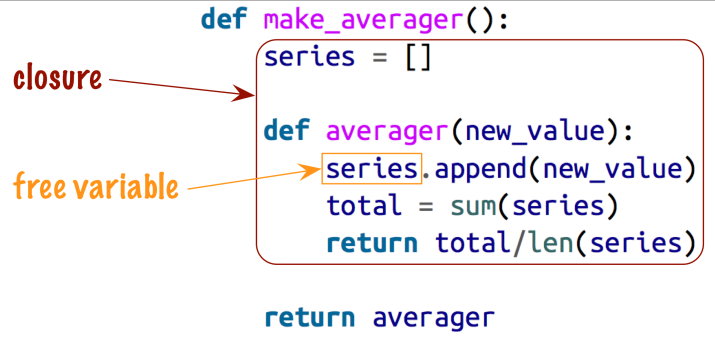

### The `nonlocal` declaration
Our previous implementation of make_averager was not efficient.A better implementation would just store the total and the number of items so far,and compute the mean from these two numbers.

In [66]:
# A broken hiher-order function to calculate a running average without keeping all history
def make_averager():
    count=0
    total=0
    
    def averager(new_value):
        count+=1
        total+=new_value
        return total/count
    
    return averager

In [67]:
avg=make_averager()
avg(10)

UnboundLocalError: local variable 'count' referenced before assignment

The problem is that the statement count+=1 acutally means the same as count = count +1, when count is a number or any immutable type. So we are acutally assigning to count in the body of averager,and that makes it a local variable.The same problem affects the total variable.  

We did not have this problem in this function:
```python
# A hihger-order function to calculate a running average
def make_averager():
    series=[]
    
    def averager(new_value):
        series.append(new_value)
        total=sum(series)
        return total/len(series)
    
    return averager
```
Because we only called * series.append * and invoked *sum* and *len* on it.So we took the advantage of the fact that lists are mutable. 

To work around this the *nonlocal* declaration was introduced in python 3.It lets you flag a variable as a free variable even when it is assigned a new value within the function.If a new value is assigned to a *nonlocal* variable,the binding stored in the closure is changed.A correct implementation of our newest *make_averager* looks like:
```python
def make_averager():
    count=0
    total=0
    
    def averager(new_value):
        nonlocal count,total
        count+=1
        total+=new_value
        return total/count
    
    return averager
```

### Decorators
A function takes another function and extends the behavior of the alter function **without** explicitly modifying it.**Put simply,decorators wrap a function,modifying its behavior**.  

Function decorators are executed as soon as module is imported,but the decorated functions only run when they are explicitly invoked.This highlights the difference between what Pythonistas call import time and run time.  

For deep understanding of decorater,refer to [this link](http://wordaligned.org/articles/echo)

#### First class objects
In python,functions are **first-class objects**.This means that functions can be passed around,and used as arguments,just like any other value(e.g,string,int,float).  

#### Nested functions
Because of the first-class nature of functions in Python,you can **define functions inside other functions**.Such functions are called nested functions. 
```python

def parent():
    print('printing from the parent() function.')
    
    def first_child():
        return 'Printing from the first_child() function.'
    
    def second_child():
        return 'printing from the second_child() function.'

    print(first_child())
    print(second_child())
```
#### Returning Functions
Python also allows you to **return functions from other functions**.

```python
def parent(num):

    def first_child():
        return "Printing from the first_child() function."

    def second_child():
        return "Printing from the second_child() function."

    try:
        assert num == 10
        return first_child
    except AssertionError:
        return second_child

foo = parent(10)
bar = parent(11)
```

### `functools.wraps`
when you use a decorator,you're replacing one function with another.In other words,if you have a decorator.
```python
def logged(func):
    def with_logging(*args,**kwargs):
        print(func.__name__+' was called')
        return func(*args,**kwargs)
    return with_logging
```

then when you say

```python
@logged
def f(x):
    '''does some math'''
    return x+x*x
```

it's exactly the same as saying

```python
def f(x):
    '''deoes some math'''
    return x+x*x
f=logged(f)
```

and your function `f` is replaced with the function with_logging.Unfortunately,this means that if you then say

```
print(f.__name__)
```

it will print `with_logging` because that's the name of your new function.In fact,if you look at teh docstring for `f`,it will be blank because `with_logging` has no docstring,and so the docstring you wrote won't be there anymore.Also,if you look at the pydoc result for that function,it won't be listed as taking one argument `x`;instead it'll be listed as taking `*args` and `**kwargs` because that's what with_logging takes.  

If using a decorator always meant losing this information about a function,it would be a serious problem.That's why we have `functools.wraps`.This takes a function used in a decorator and adds the functionality of copying over the function name,docstring,arguments list,etc.And since `wraps` is itself a decorator,the following code does the correct thing:
```python
from functools import wraps
def logged(func):
    @wraps(func)
    def with_logging(*args,**kwargs):
        print(func.__name__ + ' was called')
        return func(*args,**kwargs)
    return with_logging
   
@logged
def f(x):
    '''does some math'''
    return x+x*x
```

In [101]:
from functools import wraps
def logged(func):
    @wraps(func)
    def with_logging(*args,**kwargs):
        print(func.__name__ + ' was called')
        return func(*args,**kwargs)
    return with_logging
   
@logged
def f(x):
    '''does some math'''
    return x+x*x

In [102]:
print(f.__name__)
print(f.__doc__)

f
does some math


### Decorators in the standard library
Python has three built-in functions that are designed to decorate methods:
1. `property`
2. `classmethod`
3. `staticmethod`

### Stacked decorators
```python
@d1
@d2
def f(x):
    return x*x
```
Is the same as:
```python
def f(x):
    return x*x
f=d1(d2(f))
```
### Parametrized decorators
#### Example1

In [103]:
registry=set()
def register(active=True):
    # The decorate inner function is teh actual decorator;
    def decorate(func):
        print('runing register(active=%s)->decorate(%s)'%(active,func))
        if active:
            registry.add(func)
        else:
            registry.discard(func)
        
        return func
    
    return decorate

#register factory musted invoked as a function,with the desired parameters
@register(active=False)
def f1():
    print('running f1()')

# If no parameters are passsed,register must still be called as a function @register() to 
# return the actual decorator,decorator
@register()
def f2():
    print('running f2()')

def f3():
    print('runnning f3()')

runing register(active=False)->decorate(<function f1 at 0x000001DC0C9DC2F0>)
runing register(active=True)->decorate(<function f2 at 0x000001DC0C9DC048>)


In [105]:
f1()
f2()
f3()
print(len(registry))

running f1()
running f2()
runnning f3()
1


#### Example 2

In [113]:
import time

DEFAULT_FMT='[{elapsed:0.8f}s] {name}({args}) -> {result}'

# clock is our parametrized decorator factory
def clock(fmt=DEFAULT_FMT):
    #decorate is the actual decorator
    def decorate(func):
        #clocked wraps the decorated function
        def clocked(*_args):
            t0=time.time()
            _result=func(*_args)
            elapsed=time.time()-t0
            name=func.__name__
            args=', '.join(repr(arg) for arg in _args)
            result=repr(_result)
            # Using **locals() here allows any local variable of clocked to be referenced in the fmt
            print(fmt.format(**locals()))
            return _result
        return clocked
    return decorate

@clock()
def snooze(seconds):
    time.sleep(seconds)

for i in range(3):
    snooze(.123)

[0.12333846s] snooze(0.123) -> None
[0.12338781s] snooze(0.123) -> None
[0.12384081s] snooze(0.123) -> None


In [112]:
@clock('{name}: {elapsed}s')
def snooze(seconds):
    time.sleep(seconds)

for i in range(3):
    snooze(.123)

snooze: 0.12337350845336914s
snooze: 0.12338495254516602s
snooze: 0.12386536598205566s


#### Examples

In [95]:
import time

def timing_function(some_function):
    
    '''
    outputs the time a function takes to execute
    '''
    
    def wrapper():
        t1=time.time()
        some_function()
        t2=time.time()
        return 'Time it took  to run the function: ' + str((t2-t1))+ '\n'
    
    return wrapper

@timing_function
def my_function():
    num_list=[]
    for num in (range(0,10000)):
        num_list.append(num)
    print('\nSum of all the numbers: '+ str((sum(num_list))))

print(my_function())


Sum of all the numbers: 49995000
Time it took  to run the function: 0.0015039443969726562



In [96]:
from time import sleep

def sleep_decorator(function):
    '''
    Limits how fast the function is called.
    '''
    
    def wrapper(*args,**kwargs):
        sleep(2)
        return function(*args,**kwargs)
    return wrapper

@sleep_decorator
def print_number(num):
    return num

print(print_number(222))

for num in range(1,6):
    print(print_number(num))

222
1
2
3
4
5


In [97]:
def decorator_function(original_function):
    def wrapper_function(*args,**kwargs):
        print('wrapper executed this before {}'.format(original_function.__name__))
        return original_function(*args,**kwargs)
    
    return wrapper_function


class decorator_class(object):
    def __init__(self,original_function):
        self.original_function=original_function
        
    def __call__(self,*args,**kwargs):
        print('call method executed this before {}'.format(self.original_function.__name__))
        return self.original_function(*args,**kwargs)

@decorator_function
def display1():
    print('display function ran')

@decorator_class
def display2():
    print('display function ran')
    
display1()
display2()

wrapper executed this before display1
display function ran
call method executed this before display2
display function ran


In [98]:
def my_logger(orig_func):
    import logging
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__),level=logging.INFO)
    
    def wrapper(*args,**kwargs):
        logging.info(
        'Ran with args: {}, and kwargs: {}'.format(args,kwargs))
        orig_func(*args,**kwargs)
    
    return wrapper

@my_logger
def display_info(name,age):
    print('display_info ran with arguments ({},{})'.format(name,age))

display_info('Hank',30)

display_info ran with arguments (Hank,30)


In [99]:
def my_timer(orig_func):
    import time
    
    def wrapper(*args,**kwargs):
        t1=time.time()
        result=orig_func(*args,**kwargs)
        t2=time.time()-t1
        print('{} ran in : {} sec'.format(orig_func.__name__,t2))
        return result
    
    return wrapper

@my_timer
@my_logger
def display_info(name,age):
    print('display_info ran with arguments ({},{})'.format(name,age))

'''
The function above equals:

display_info=my_timer(my_logger(display_info))
'''
    
display_info('Tom',22)

display_info ran with arguments (Tom,22)
wrapper ran in : 0.0 sec


### Tricks
1. you can use map to decorator a bunch of functions at one time.For example:
    ```
    f,g,h,k=map(echo,[f,g,h,k]) #echo is a decorator
    ```

### `closure`,`partial` and `decorator`
Creating a closure is a technique for doing things.You can do a bunch of things with closures.On the other hand,`partial` and `decorator` are particular purpose.Maybe they use closures.Maybe they don't.That's an implementation detail,and you don't need to worry about it.What's important is that they achieve the result you want.  

Consider a `partial`One way to create it would be to use a closure:
```python
def partial(f,*args):
    def pf(*rest):
        return f(*args,*rest)
    return pf
```
But id doesn't have to be that way.For example:
```python
class Partial:
    def __init__(self,func,args):
        self.args=args
        self.func=func
     
    def __call__(self，*rest):
         f=self.func
         args=self.args
         return f(*args,*rest)

def partial(f,*args)
    return Partial(f,args)
```
There's no closure here.But I get the partial behavior,so who cares?  

The same is for decorators.A decorator might be a closure,or it might not.

# Object Oriented Idioms
## `classmethod` versus `staticmethod`
refer to [this link](https://stackoverflow.com/questions/12179271/meaning-of-classmethod-and-staticmethod-for-beginner)

# Python cookbook
## Data Structures and Algorithms
### `collection.deque` Keeping the last N items 
Keeping a limited history is a pperfect use for a `collection.deque`
```python
from collections import deque

def search(lines,pattern,history=5)：
    previous_lines=deque(maxlen=history)
    for line in lines:
    if pattern in line:
        yield line,previous_lines
    previous_lines.append(line)
```
### `heapq.nlargets()` finding the largest or smallest N items

In [1]:
import heapq

nums = [1, 8, 2, 23, 7, -4, 18, 23, 42, 37, 2]
print(heapq.nlargest(3, nums)) # Prints [42, 37, 23]
print(heapq.nsmallest(3, nums)) # Prints [-4, 1, 2]

[42, 37, 23]
[-4, 1, 2]


In [2]:
portfolio = [
{'name': 'IBM', 'shares': 100, 'price': 91.1},
{'name': 'AAPL', 'shares': 50, 'price': 543.22},
{'name': 'FB', 'shares': 200, 'price': 21.09},
{'name': 'HPQ', 'shares': 35, 'price': 31.75},
{'name': 'YHOO', 'shares': 45, 'price': 16.35},
{'name': 'ACME', 'shares': 75, 'price': 115.65}
]
cheap = heapq.nsmallest(3, portfolio, key=lambda s: s['price'])
expensive = heapq.nlargest(3, portfolio, key=lambda s: s['price'])

### `defaultdict` Mapping keys to multiple values in a dictionary

Initialization of the first value can be messy.
```python
d={}
for key,value in pairs:
    if key not in d:
        d[key]=[]
    d[key].append(value)
```

In [3]:
from collections import defaultdict

d=defaultdict(list)
d['a'].append(1)
d['a'].append(2)
d['b'].append(4)

In [4]:
d={} # A regular dictionary
d.setdefault('a',[]).append(1)
d.setdefault('a',[]).append(2)
d.setdefault('b',[]).append(4)

### `OrderedDict` Keeping dictionaries in order

In [6]:
from collections import OrderedDict

d=OrderedDict()
d['foo']=1
d['bar']=2
d['spam']=3
d['grok']=4

for key in d:
    print(key,d[key])

foo 1
bar 2
spam 3
grok 4


In [8]:
import json
json.dumps(d)

'{"foo": 1, "bar": 2, "spam": 3, "grok": 4}'

### Calculating with Dictionaries

In [9]:
prices = {
'ACME': 45.23,
'AAPL': 612.78,
'IBM': 205.55,
'HPQ': 37.20,
'FB': 10.75
}

In [11]:
min_price=min(zip(prices.values(),prices.keys()))
print(min_price)

(10.75, 'FB')


In [14]:
# If you try to perform common data reductions on a dictionary,you'll
# find that they only process the keys,not the values.
min(prices)

'AAPL'

In [13]:
min(prices,key=lambda x:prices[x])

'FB'

### Finding commonalities in Two dictionaries

In [15]:
a={'x':1,'y':2,'z':3}
b={'w':10,'x':11,'y':2}

In [16]:
# Find keys in common
a.keys() & b.keys()

{'x', 'y'}

In [17]:
# Find keys in a that not in b
a.keys()-b.keys()

{'z'}

In [19]:
# Find (key,value) pairs in common
a.items() & b.items()

{('y', 2)}

In [21]:
# make a new dictionary with certain keys removed
c={key:a[key] for key in a.keys()-{'z','w'}}
c

{'x': 1, 'y': 2}

### Removing duplicates from a sequence while maintaining order
If the values in the sequence are hashable,we can do as the following.

In [1]:
def dedupe(items):
    seen=set()
    for item in items:
        if item not in seen:
            yield item
            seen.add(item)

This only works if the items in the sequence are hashable.If you are trying to eliminate duplicates in a sequence of unhashable types (such as dicts),you can make a slight change to this recipe,as follows：

In [6]:
def dedupe(items,key=None):
    seen=set()
    for item in items:
        val=item if key is None else key(item)
        if val not in seen:
            yield item
            seen.add(val)

In [7]:
a=[{'x':1,'y':2},{'x':1,'y':3},{'x':1,'y':2},{'x':2,'y':4}]

list(dedupe(a,key=lambda d:(d['x'],d['y'])))

[{'x': 1, 'y': 2}, {'x': 1, 'y': 3}, {'x': 2, 'y': 4}]

In [8]:
list(dedupe(a,key=lambda d:d['x']))

[{'x': 1, 'y': 2}, {'x': 2, 'y': 4}]

# Jupyter
The name jupyter is an indirect acronyum of the three core languages it was designed for:**JU**lia,**PYT**hon,and **R** and is inspired by the planet jupiter.  

When working with Python in Jupyter,the IPython kernel is used.which give us some handy access to IPython features from within our Jupyter notebooks.

## Pretty display of variables
1.By setting  `ast_note_interactivity` as 'all',you can see the value of multiple statements at once.

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

from pydataset import data
quakes=data('quakes')
quakes.head()
quakes.tail()

,lat,long,depth,mag,stations
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11


,lat,long,depth,mag,stations
996,-25.93,179.54,470,4.4,22
997,-12.28,167.06,248,4.7,35
998,-20.13,184.20,244,4.5,34
999,-17.40,187.80,40,4.5,14
1000,-21.59,170.56,165,6.0,119


If you want to set this behavior for all instances of Jupyter (Notebook and Console),simply create a file `~/.ipython/profile_default/ipython_config.py` with the lines below:
```python
c=get_config()

#Run all nodes interactively
c.InteractiveShell.ast_node_interactivity='all'
```

## Plotting in notebooks
`%matplotlib inline`

## Ipython Magic Commands

In [31]:
# list all magic command
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

### `%run`:execute python code
`%run` can execute both .py files and jupyter notebooks.

Note that using `%run` is not the same as importing a python module.

### `load`: Insert the code from an external script

### `%%time` and `%timeit`
These are especially handy when you have some slow code and you're trying to indentifying where the issue is.  
`%%time` will give you information about a single run of the code in your cell.  
`%%timeit` will uses the Python timeit module which runs a statement 100,000 times (by default) and then provides the mean of the fastest three times.

In [32]:
%%time
import time
for _ in range(1000):
    time.sleep(0.01)

Wall time: 14.4 s


In [33]:
import numpy

%timeit numpy.random.normal(size=100)

5.67 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Suppress the output of a final function
To do this,you just add a semicoloon at the end.

In [34]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy
x=numpy.linspace(0,1,1000)**1.5

(array([216., 126., 106.,  95.,  87.,  81.,  77.,  73.,  71.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

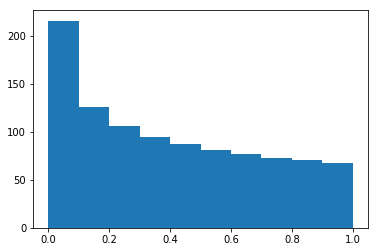

In [35]:
# Here you get the output of the function
plt.hist(x)

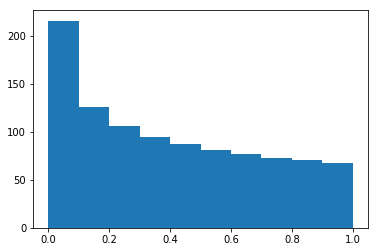

In [36]:
# By adding a semicolon at the end,the output is suppressed
plt.hist(x);

## Executing Shell commands

In [41]:
ls *.ipynb

 驱动器 D 中的卷是 LENOVO
 卷的序列号是 26F4-F274

 D:\zht\code\notebook 的目录

2018/02/09  14:55             2,499 .~gitStudyNotes.ipynb
2018/02/10  09:06             4,470 cite2c-A jupyter extension for zotero.ipynb
2018/02/10  09:06         2,286,421 dataAnalysis_summary.ipynb
2018/02/09  14:55           354,705 Estimating Standard Errors in Python.ipynb
2018/03/07  12:41            13,138 fluent_python_studyNotes.ipynb
2018/02/09  14:55             3,502 gitStudyNotes.ipynb
2018/03/29  00:40             3,642 latex equation field.ipynb
2018/03/31  00:36           105,083 matplotlib.ipynb
2018/02/10  18:58               951 numpy_notes.ipynb
2018/04/03  20:09           674,763 pandas handbook.ipynb
2018/02/09  20:22           569,183 Pandas_API.ipynb
2018/02/09  14:55             9,391 pelicanStudyNotes.ipynb
2018/02/09  14:55             9,278 pelicanSyntax.ipynb
2017/05/26  16:46             9,697 Performance and Code Optimization.ipynb
2017/06/26  18:17             9,586 plotly.ipynb
2018/04/04

## Multicursor support
click and drag your mouse while holding down `alt`
![](https://www.dataquest.io/blog/content/images/multiline.gif)

## Profiling and timing code
1. `%time`:Time the execution of a single statement
2. `%timeit`:Time repeated execution of a single statement for more accuracy
3. `%prun`:Run code with the profiler
4. `%lprun`:Run code with the line-by-line profiler
5. `%memit`:measure the memory use of a single statement
6. `%mprun`:Run code with the line-by-line memory profiler

## Timing code Snippets:`%timeit` and `%time`
`%timeit` for line-magic  
`%%timeit` for cell-magic

In [2]:
%timeit sum(range(100))

1.19 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [3]:
%%timeit
total=0
for i in range(1000):
    for j in range(1000):
        total+=i*(-1)**j

416 ms ± 5.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Sometimes repeating an operation is note the best option.For example,if we have a list that we'd like to sort,we might be misled by a repeated operation.Sorting a pre-sorted list is much faster than sorting an unsorted list,so the repetition will skew the result:

In [4]:
import random
L=[random.random() for i in range(100000)]
%timeit L.sort()

1.51 ms ± 62.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For this,the `%time` magic function may be a better choice.It also is a good choice for longer-running commands,when short,system-related delays are unlikely to affect the result.Let's time the sorting of an unsorted and a presorted list:

In [5]:
import random
L=[random.random() for i in range(100000)]
print('sorting an unsorted list:')
%time L.sort()

sorting an unsorted list:
Wall time: 35.1 ms


In [6]:
print('sorting an already sorted list:')
%time L.sort()

sorting an already sorted list:
Wall time: 2.01 ms


## Profiling full scripts:`%prun`

In [7]:
def sum_of_lists(N):
    total=0
    for i in range(5):
        L=[j^(j>>i) for j in range(N)]
        total+=sum(L)
    return total

In [9]:
%prun sum_of_lists(1000000)

The result is as follows:
```
         14 function calls in 0.816 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.662    0.132    0.662    0.132 <ipython-input-7-6bcd3b93ec33>:4(<listcomp>)
        5    0.106    0.021    0.106    0.021 {built-in method builtins.sum}
        1    0.036    0.036    0.804    0.804 <ipython-input-7-6bcd3b93ec33>:1(sum_of_lists)
        1    0.012    0.012    0.816    0.816 <string>:1(<module>)
        1    0.000    0.000    0.816    0.816 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

In [11]:
%load_ext line_profiler

In [12]:
%lprun -f sum_of_lists sum_of_lists(5000)

The result is as follows:
```
Timer unit: 3.64673e-07 s

Total time: 0.00769532 s
File: <ipython-input-7-6bcd3b93ec33>
Function: sum_of_lists at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def sum_of_lists(N):
     2         1          5.0      5.0      0.0      total=0
     3         6         18.0      3.0      0.1      for i in range(5):
     4         5      20470.0   4094.0     97.0          L=[j^(j>>i) for j in range(N)]
     5         5        608.0    121.6      2.9          total+=sum(L)
     6         1          1.0      1.0      0.0      return total
```

## Profiling memory use:`%memit` and `%mprun`

In [14]:
%load_ext memory_profiler

In [15]:
%memit sum_of_lists(1000000)

peak memory: 121.80 MiB, increment: 74.83 MiB


For a line-by-line description of memory use,we can use the `%mprun` magic.Unfortunately,this magic works only for functions defined in separate modules rather than the notebook itself,so we'll start by using the `%%file` magic to create a simple module called `mprun_demo.py`,which contains our `sum_of_lists` function,with one addition that will make our memory profiling results more clear:

In [16]:
%%file mprun_demo.py
def sum_of_lists(N):
    total=0
    for i in range(5):
        L=[j^(j>>i) for j in range(N)]
        total+=sum(L)
        del L #remove reference to L
    return total

Writing mprun_demo.py


In [17]:
from mprun_demo import sum_of_lists
%mprun -f sum_of_lists sum_of_lists(100000)

The result is as follows:
```
Filename: D:\zht\code\notebook\mprun_demo.py

Line #    Mem usage    Increment   Line Contents
================================================
     1     49.1 MiB     49.1 MiB   def sum_of_lists(N):
     2     49.1 MiB      0.0 MiB       total=0
     3     49.1 MiB      0.0 MiB       for i in range(5):
     4     51.3 MiB -569451.7 MiB           L=[j^(j>>i) for j in range(N)]
     5     51.3 MiB     -0.2 MiB           total+=sum(L)
     6     49.0 MiB     -9.5 MiB           del L #remove reference to L
     7     49.0 MiB     -0.1 MiB       return total
```